In [0]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms

import helper
# !wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
# import importlib
# importlib.reload(helper)

In [0]:
EPOCHS = 2
BATCH_SIZE = 10
LEARNING_RATE = 0.003
TRAIN_DATA_PATH = "Data/train/"
TEST_DATA_PATH = "Data/test/"
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
trainloader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
testloader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4) 


24
316


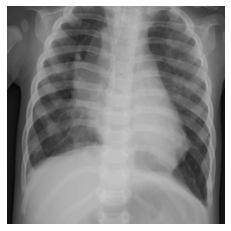

In [0]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(196608, 784)
        self.fc2 = nn.Linear(784, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

print(trainloader.dataset.classes)

['NORMAL', 'PNEUMONIA']


In [0]:
# TODO: Train the network here
epochs = 3
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        cnt_images +=1
        log_ps = model(images)
        loss = criterion(log_ps, labels)        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        
    print(f"Training loss: {running_loss}")
    break

    

Training loss: 0.6944217681884766
Training loss: 93.36752319335938
Training loss: 49.834434509277344


# New Section

# New Section

# New Section